## Анализ бизнес-показателей

### Цель исследования

1. Изучить откуда приходят пользователи в приложение и какими устройствами пользуются.
2. Определить сколько стоит привлечение пользователей из разных рекламных каналов.
3. Посчитать сколько денег приносит каждый клиент.
4. Сделать выводы касаемо того, окупаются ли расходы на привлечение клиентов.
5. Определить какие факторы мешают привлечению клиентов. 

#### Ход исследования

1. Загрузка и предобработка данных.
2. Функции для расчета и анализа.
3. Исследовательский анализ данных.
4. Исследование маркетингового бюджета.
5. Исследование окупаемости рекламы. 
6. Выводы и рекомендации.

### Загрузим данные и подготовим их к анализу

**Пути к файлам**

- визиты: `/datasets/visits_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/visits_info_short.csv);
- заказы: `/datasets/orders_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/orders_info_short.csv);
- расходы: `/datasets/costs_info_short.csv`. [Скачать датасет](https://code.s3.yandex.net/datasets/costs_info_short.csv).

Изучим данные и выполним предобработку. 

#### Библиотеки

Импортируем необходимые библиотеки

In [1]:
#импортируем библиотеки
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime, timedelta
from matplotlib import pyplot as plt

#### Датасеты

Загрузим датасеты

In [2]:
#данные с визитами, заказами, расходами
visits = pd.read_csv('/datasets/visits_info_short.csv')
orders = pd.read_csv('/datasets/orders_info_short.csv')
costs = pd.read_csv('/datasets/costs_info_short.csv')
events = None  # других событий нет, None — чтобы не «сломать» get_profiles()

Посмотрим общую информацию о данных в файле с визитами методами info(), head()

In [3]:
visits.head(5)

User Id         Region   Device  Channel        Session Start  \
0  981449118918  United States   iPhone  organic  2019-05-01 02:36:01   
1  278965908054  United States   iPhone  organic  2019-05-01 04:46:31   
2  590706206550  United States      Mac  organic  2019-05-01 14:09:25   
3  326433527971  United States  Android   TipTop  2019-05-01 00:29:59   
4  349773784594  United States      Mac  organic  2019-05-01 03:33:35   

           Session End  
0  2019-05-01 02:45:01  
1  2019-05-01 04:47:35  
2  2019-05-01 15:32:08  
3  2019-05-01 00:54:25  
4  2019-05-01 03:57:40

In [4]:
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   User Id        309901 non-null  int64 
 1   Region         309901 non-null  object
 2   Device         309901 non-null  object
 3   Channel        309901 non-null  object
 4   Session Start  309901 non-null  object
 5   Session End    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


In [5]:
#посмотрим уникальные значения для region
visits['Region'].unique()

array(['United States', 'UK', 'France', 'Germany'], dtype=object)

In [6]:
#посмотрим уникальные значения для region
visits['Device'].unique()

array(['iPhone', 'Mac', 'Android', 'PC'], dtype=object)

In [7]:
#посмотрим уникальные значения для Channel
visits['Channel'].unique()

array(['organic', 'TipTop', 'RocketSuperAds', 'YRabbit', 'FaceBoom',
       'MediaTornado', 'AdNonSense', 'LeapBob', 'WahooNetBanner',
       'OppleCreativeMedia', 'lambdaMediaAds'], dtype=object)

В значениях нет анамалий. 

Посмотрим общую информацию о данных в файле с заказами методами info() и head()

In [8]:
orders.head(5)

User Id             Event Dt  Revenue
0  188246423999  2019-05-01 23:09:52     4.99
1  174361394180  2019-05-01 12:24:04     4.99
2  529610067795  2019-05-01 11:34:04     4.99
3  319939546352  2019-05-01 15:34:40     4.99
4  366000285810  2019-05-01 13:59:51     4.99

In [9]:
orders.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40212 entries, 0 to 40211
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   User Id   40212 non-null  int64  
 1   Event Dt  40212 non-null  object 
 2   Revenue   40212 non-null  float64
dtypes: float64(1), int64(1), object(1)
memory usage: 942.6+ KB


In [10]:
orders['Event Dt'].min()

'2019-05-01 00:28:11'

In [11]:
orders['Event Dt'].max()

'2019-10-31 23:56:56'

Даты заказов в рамках условий проекта. 

Посмотрим общую информацию о данных в файле с расходами методами info() и head()

In [12]:
costs.head(5)

dt   Channel  costs
0  2019-05-01  FaceBoom  113.3
1  2019-05-02  FaceBoom   78.1
2  2019-05-03  FaceBoom   85.8
3  2019-05-04  FaceBoom  136.4
4  2019-05-05  FaceBoom  122.1

In [13]:
costs.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1800 entries, 0 to 1799
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   dt       1800 non-null   object 
 1   Channel  1800 non-null   object 
 2   costs    1800 non-null   float64
dtypes: float64(1), object(2)
memory usage: 42.3+ KB


In [14]:
costs['costs'].describe()

count    1800.000000
mean       58.609611
std       107.740223
min         0.800000
25%         6.495000
50%        12.285000
75%        33.600000
max       630.000000
Name: costs, dtype: float64

Сosts представлен нормальными значениями. 

#### Предобработка датасетов

Преобразуем названия столбцов датасетов

In [15]:
visits.columns = ['user_id', 'region', 'device', 'channel', 'session_start', 'session_end']  
orders.columns = ['user_id', 'event_dt', 'revenue'] 
costs.columns = ['dt', 'channel', 'costs'] 

In [16]:
#проверим корректно изменения на примере visits
visits.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 309901 entries, 0 to 309900
Data columns (total 6 columns):
 #   Column         Non-Null Count   Dtype 
---  ------         --------------   ----- 
 0   user_id        309901 non-null  int64 
 1   region         309901 non-null  object
 2   device         309901 non-null  object
 3   channel        309901 non-null  object
 4   session_start  309901 non-null  object
 5   session_end    309901 non-null  object
dtypes: int64(1), object(5)
memory usage: 14.2+ MB


Все три файла имеют данные связанные с датой. Эти данные понадобятся нам для анализа. Во всех датасетах данные имеют не подходящий тип object. Исправим это.

In [17]:
# преобразование данных о времени
visits['session_start'] = pd.to_datetime(visits['session_start'])
orders['event_dt'] = pd.to_datetime(orders['event_dt'])
costs['dt'] = pd.to_datetime(costs['dt']).dt.date 

Наличие дубликатов имеет смысл проверять только построчно. Все остальные значение (такие как id, который сам по себе уникален) - могут повторяться в датасетах, так как один пользователь мог несколько раз посещать приложение и несколько раз оформлять покупку.

In [18]:
visits[visits.duplicated(keep=False)]

Empty DataFrame
Columns: [user_id, region, device, channel, session_start, session_end]
Index: []

In [19]:
orders[orders.duplicated(keep=False)]

Empty DataFrame
Columns: [user_id, event_dt, revenue]
Index: []

In [20]:
costs[costs.duplicated(keep=False)]

Empty DataFrame
Columns: [dt, channel, costs]
Index: []

 В ходе предобработки данных мы: 
- изучили структуру датасетов;
- изменили названия столбцов;
- изменили формат столбцов с датой и временем;
- выявили, что построчных дублей нет.

### Зададим функции для расчёта и анализа LTV, ROI, удержания и конверсии.

(функции из теоретических уроков)

Это функции для вычисления значений метрик:

- `get_profiles()` — для создания профилей пользователей,
- `get_retention()` — для подсчёта Retention Rate,
- `get_conversion()` — для подсчёта конверсии,
- `get_ltv()` — для подсчёта LTV.

А также функции для построения графиков:

- `filter_data()` — для сглаживания данных,
- `plot_retention()` — для построения графика Retention Rate,
- `plot_conversion()` — для построения графика конверсии,
- `plot_ltv_roi` — для визуализации LTV и ROI.

#### Get_profiles()

Создадим функция для создания пользовательских профилей

In [21]:
def get_profiles(sessions, orders, events, ad_costs, event_names=[]):

    # находим параметры первых посещений
    profiles = (
        sessions.sort_values(by=['user_id', 'session_start'])
        .groupby('user_id')
        .agg(
            {
                'session_start': 'first',
                'channel': 'first',
                'device': 'first',
                'region': 'first',
            }
        )
        .rename(columns={'session_start': 'first_ts'})
        .reset_index()
    )

    # для когортного анализа определяем дату первого посещения
    # и первый день месяца, в который это посещение произошло
    profiles['dt'] = profiles['first_ts'].dt.date
    profiles['month'] = profiles['first_ts'].astype('datetime64[M]')

    # добавляем признак платящих пользователей
    profiles['payer'] = profiles['user_id'].isin(orders['user_id'].unique())

    # добавляем флаги для всех событий из event_names
    for event in event_names:
        if event in events['event_name'].unique():
            profiles[event] = profiles['user_id'].isin(
                events.query('event_name == @event')['user_id'].unique()
            )

    # считаем количество уникальных пользователей
    # с одинаковыми источником и датой привлечения
    new_users = (
        profiles.groupby(['dt', 'channel'])
        .agg({'user_id': 'nunique'})
        .rename(columns={'user_id': 'unique_users'})
        .reset_index()
    )

    # объединяем траты на рекламу и число привлечённых пользователей
    ad_costs = ad_costs.merge(new_users, on=['dt', 'channel'], how='left')

    # делим рекламные расходы на число привлечённых пользователей
    ad_costs['acquisition_cost'] = ad_costs['costs'] / ad_costs['unique_users']

    # добавляем стоимость привлечения в профили
    profiles = profiles.merge(
        ad_costs[['dt', 'channel', 'acquisition_cost']],
        on=['dt', 'channel'],
        how='left',
    )

    # стоимость привлечения органических пользователей равна нулю
    profiles['acquisition_cost'] = profiles['acquisition_cost'].fillna(0)

    return profiles

#### Get_retention()

Функция для расчета удержания

In [22]:
# функция для расчёта удержания

def get_retention(
    profiles,
    sessions,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # добавляем столбец payer в передаваемый dimensions список
    dimensions = ['payer'] + dimensions

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # собираем «сырые» данные для расчёта удержания
    result_raw = result_raw.merge(
        sessions[['user_id', 'session_start']], on='user_id', how='left'
    )
    result_raw['lifetime'] = (
        result_raw['session_start'] - result_raw['first_ts']
    ).dt.days

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу удержания
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # получаем таблицу динамики удержания
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Get_conversion()

Функция для расчета конверсии 

In [23]:

# функция для расчёта конверсии

def get_conversion(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')

    # определяем дату и время первой покупки для каждого пользователя
    first_purchases = (
        purchases.sort_values(by=['user_id', 'event_dt'])
        .groupby('user_id')
        .agg({'event_dt': 'first'})
        .reset_index()
    )

    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        first_purchases[['user_id', 'event_dt']], on='user_id', how='left'
    )

    # рассчитываем лайфтайм для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days

    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users' 
        dimensions = dimensions + ['cohort']

    # функция для группировки таблицы по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        result = df.pivot_table(
            index=dims, columns='lifetime', values='user_id', aggfunc='nunique'
        )
        result = result.fillna(0).cumsum(axis = 1)
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # делим каждую «ячейку» в строке на размер когорты
        # и получаем conversion rate
        result = result.div(result['cohort_size'], axis=0)
        result = result[['cohort_size'] + list(range(horizon_days))]
        result['cohort_size'] = cohort_sizes
        return result

    # получаем таблицу конверсии
    result_grouped = group_by_dimensions(result_raw, dimensions, horizon_days)

    # для таблицы динамики конверсии убираем 'cohort' из dimensions
    if 'cohort' in dimensions: 
        dimensions = []

    # получаем таблицу динамики конверсии
    result_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    # возвращаем обе таблицы и сырые данные
    return result_raw, result_grouped, result_in_time 

#### Get_ltv()

Функция для расчета LTV и ROI

In [24]:
# функция для расчёта LTV и ROI

def get_ltv(
    profiles,
    purchases,
    observation_date,
    horizon_days,
    dimensions=[],
    ignore_horizon=False,
):

    # исключаем пользователей, не «доживших» до горизонта анализа
    last_suitable_acquisition_date = observation_date
    if not ignore_horizon:
        last_suitable_acquisition_date = observation_date - timedelta(
            days=horizon_days - 1
        )
    result_raw = profiles.query('dt <= @last_suitable_acquisition_date')
    # добавляем данные о покупках в профили
    result_raw = result_raw.merge(
        purchases[['user_id', 'event_dt', 'revenue']], on='user_id', how='left'
    )
    # рассчитываем лайфтайм пользователя для каждой покупки
    result_raw['lifetime'] = (
        result_raw['event_dt'] - result_raw['first_ts']
    ).dt.days
    # группируем по cohort, если в dimensions ничего нет
    if len(dimensions) == 0:
        result_raw['cohort'] = 'All users'
        dimensions = dimensions + ['cohort']

    # функция группировки по желаемым признакам
    def group_by_dimensions(df, dims, horizon_days):
        # строим «треугольную» таблицу выручки
        result = df.pivot_table(
            index=dims, columns='lifetime', values='revenue', aggfunc='sum'
        )
        # находим сумму выручки с накоплением
        result = result.fillna(0).cumsum(axis=1)
        # вычисляем размеры когорт
        cohort_sizes = (
            df.groupby(dims)
            .agg({'user_id': 'nunique'})
            .rename(columns={'user_id': 'cohort_size'})
        )
        # объединяем размеры когорт и таблицу выручки
        result = cohort_sizes.merge(result, on=dims, how='left').fillna(0)
        # считаем LTV: делим каждую «ячейку» в строке на размер когорты
        result = result.div(result['cohort_size'], axis=0)
        # исключаем все лайфтаймы, превышающие горизонт анализа
        result = result[['cohort_size'] + list(range(horizon_days))]
        # восстанавливаем размеры когорт
        result['cohort_size'] = cohort_sizes

        # собираем датафрейм с данными пользователей и значениями CAC, 
        # добавляя параметры из dimensions
        cac = df[['user_id', 'acquisition_cost'] + dims].drop_duplicates()

        # считаем средний CAC по параметрам из dimensions
        cac = (
            cac.groupby(dims)
            .agg({'acquisition_cost': 'mean'})
            .rename(columns={'acquisition_cost': 'cac'})
        )

        # считаем ROI: делим LTV на CAC
        roi = result.div(cac['cac'], axis=0)

        # удаляем строки с бесконечным ROI
        roi = roi[~roi['cohort_size'].isin([np.inf])]

        # восстанавливаем размеры когорт в таблице ROI
        roi['cohort_size'] = cohort_sizes

        # добавляем CAC в таблицу ROI
        roi['cac'] = cac['cac']

        # в финальной таблице оставляем размеры когорт, CAC
        # и ROI в лайфтаймы, не превышающие горизонт анализа
        roi = roi[['cohort_size', 'cac'] + list(range(horizon_days))]

        # возвращаем таблицы LTV и ROI
        return result, roi

    # получаем таблицы LTV и ROI
    result_grouped, roi_grouped = group_by_dimensions(
        result_raw, dimensions, horizon_days
    )

    # для таблиц динамики убираем 'cohort' из dimensions
    if 'cohort' in dimensions:
        dimensions = []

    # получаем таблицы динамики LTV и ROI
    result_in_time, roi_in_time = group_by_dimensions(
        result_raw, dimensions + ['dt'], horizon_days
    )

    return (
        result_raw,  # сырые данные
        result_grouped,  # таблица LTV
        result_in_time,  # таблица динамики LTV
        roi_grouped,  # таблица ROI
        roi_in_time,  # таблица динамики ROI
    ) 

#### Filter_data()

Функция для сглаживания данных

In [25]:
def filter_data(df, window):
    # для каждого столбца применяем скользящее среднее
    for column in df.columns.values:
        df[column] = df[column].rolling(window).mean() 
    return df 

#### Plot_retention()

Функция для построения графика Retention Rate

In [26]:
# функция для визуализации удержания

def plot_retention(retention, retention_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 10))

    # исключаем размеры когорт и удержание первого дня
    retention = retention.drop(columns=['cohort_size', 0])
    # в таблице динамики оставляем только нужный лайфтайм
    retention_history = retention_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # если в индексах таблицы удержания только payer,
    # добавляем второй признак — cohort
    if retention.index.nlevels == 1:
        retention['cohort'] = 'All users'
        retention = retention.reset_index().set_index(['cohort', 'payer'])

    # в таблице графиков — два столбца и две строки, четыре ячейки
    # в первой строим кривые удержания платящих пользователей
    ax1 = plt.subplot(2, 2, 1)
    retention.query('payer == True').droplevel('payer').T.plot(
        grid=True, ax=ax1
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание платящих пользователей')

    # во второй ячейке строим кривые удержания неплатящих
    # вертикальная ось — от графика из первой ячейки
    ax2 = plt.subplot(2, 2, 2, sharey=ax1)
    retention.query('payer == False').droplevel('payer').T.plot(
        grid=True, ax=ax2
    )
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Удержание неплатящих пользователей')

    # в третьей ячейке — динамика удержания платящих
    ax3 = plt.subplot(2, 2, 3)
    # получаем названия столбцов для сводной таблицы
    columns = [
        name
        for name in retention_history.index.names
        if name not in ['dt', 'payer']
    ]
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == True').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания платящих пользователей на {}-й день'.format(
            horizon
        )
    )

    # в чётвертой ячейке — динамика удержания неплатящих
    ax4 = plt.subplot(2, 2, 4, sharey=ax3)
    # фильтруем данные и строим график
    filtered_data = retention_history.query('payer == False').pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax4)
    plt.xlabel('Дата привлечения')
    plt.title(
        'Динамика удержания неплатящих пользователей на {}-й день'.format(
            horizon
        )
    )
    
    plt.tight_layout()
    plt.show()

#### Plot_conversion()

Функция для построения графика конверсии

In [27]:
# функция для визуализации конверсии

def plot_conversion(conversion, conversion_history, horizon, window=7):

    # задаём размер сетки для графиков
    plt.figure(figsize=(15, 5))

    # исключаем размеры когорт
    conversion = conversion.drop(columns=['cohort_size'])
    # в таблице динамики оставляем только нужный лайфтайм
    conversion_history = conversion_history.drop(columns=['cohort_size'])[
        [horizon - 1]
    ]

    # первый график — кривые конверсии
    ax1 = plt.subplot(1, 2, 1)
    conversion.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('Конверсия пользователей')

    # второй график — динамика конверсии
    ax2 = plt.subplot(1, 2, 2, sharey=ax1)
    columns = [
        # столбцами сводной таблицы станут все столбцы индекса, кроме даты
        name for name in conversion_history.index.names if name not in ['dt']
    ]
    filtered_data = conversion_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика конверсии пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

#### Plot_ltv_roi()

Функция для визуализации LTV и ROI

In [28]:
# функция для визуализации LTV и ROI

def plot_ltv_roi(ltv, ltv_history, roi, roi_history, horizon, window=7):

    # задаём сетку отрисовки графиков
    plt.figure(figsize=(20, 10))

    # из таблицы ltv исключаем размеры когорт
    ltv = ltv.drop(columns=['cohort_size'])
    # в таблице динамики ltv оставляем только нужный лайфтайм
    ltv_history = ltv_history.drop(columns=['cohort_size'])[[horizon - 1]]

    # стоимость привлечения запишем в отдельный фрейм
    cac_history = roi_history[['cac']]

    # из таблицы roi исключаем размеры когорт и cac
    roi = roi.drop(columns=['cohort_size', 'cac'])
    # в таблице динамики roi оставляем только нужный лайфтайм
    roi_history = roi_history.drop(columns=['cohort_size', 'cac'])[
        [horizon - 1]
    ]

    # первый график — кривые ltv
    ax1 = plt.subplot(2, 3, 1)
    ltv.T.plot(grid=True, ax=ax1)
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('LTV')

    # второй график — динамика ltv
    ax2 = plt.subplot(2, 3, 2, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in ltv_history.index.names if name not in ['dt']]
    filtered_data = ltv_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax2)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика LTV пользователей на {}-й день'.format(horizon))

    # третий график — динамика cac
    ax3 = plt.subplot(2, 3, 3, sharey=ax1)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in cac_history.index.names if name not in ['dt']]
    filtered_data = cac_history.pivot_table(
        index='dt', columns=columns, values='cac', aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax3)
    plt.xlabel('Дата привлечения')
    plt.title('Динамика стоимости привлечения пользователей')

    # четвёртый график — кривые roi
    ax4 = plt.subplot(2, 3, 4)
    roi.T.plot(grid=True, ax=ax4)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.legend()
    plt.xlabel('Лайфтайм')
    plt.title('ROI')

    # пятый график — динамика roi
    ax5 = plt.subplot(2, 3, 5, sharey=ax4)
    # столбцами сводной таблицы станут все столбцы индекса, кроме даты
    columns = [name for name in roi_history.index.names if name not in ['dt']]
    filtered_data = roi_history.pivot_table(
        index='dt', columns=columns, values=horizon - 1, aggfunc='mean'
    )
    filter_data(filtered_data, window).plot(grid=True, ax=ax5)
    plt.axhline(y=1, color='red', linestyle='--', label='Уровень окупаемости')
    plt.xlabel('Дата привлечения')
    plt.title('Динамика ROI пользователей на {}-й день'.format(horizon))

    plt.tight_layout()
    plt.show() 

### Исследовательский анализ данных

- Составим профили пользователей. Определим минимальную и максимальную даты привлечения пользователей.
- Выясним, из каких стран пользователи приходят в приложение и на какую страну приходится больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих из каждой страны.
- Узнаем, какими устройствами пользуются клиенты и какие устройства предпочитают платящие пользователи. Построим таблицу, отражающую количество пользователей и долю платящих для каждого устройства.
- Изучиим рекламные источники привлечения и определите каналы, из которых пришло больше всего платящих пользователей. Построим таблицу, отражающую количество пользователей и долю платящих для каждого канала привлечения.

#### Профили пользователей

Составим профили пользователей

In [29]:
#вызовим функцию get_profiles
profiles = get_profiles(visits, orders, events, costs)
profiles.head(5)

user_id            first_ts     channel  device         region  \
0    599326 2019-05-07 20:58:57    FaceBoom     Mac  United States   
1   4919697 2019-07-09 12:46:07    FaceBoom  iPhone  United States   
2   6085896 2019-10-01 09:58:33     organic  iPhone         France   
3  22593348 2019-08-22 21:35:48  AdNonSense      PC        Germany   
4  31989216 2019-10-02 00:07:44     YRabbit  iPhone  United States   

           dt      month  payer  acquisition_cost  
0  2019-05-07 2019-05-01   True          1.088172  
1  2019-07-09 2019-07-01  False          1.107237  
2  2019-10-01 2019-10-01  False          0.000000  
3  2019-08-22 2019-08-01  False          0.988235  
4  2019-10-02 2019-10-01  False          0.230769

Определим минимальную и максимальную даты привлечения пользователей.

In [30]:
#минимальная дата
profiles['dt'].min()

datetime.date(2019, 5, 1)

In [31]:
#максимальная дата
profiles['dt'].max()

datetime.date(2019, 10, 27)

Даты соответствуют написаннному в тз ("данные о пользователях с 1 мая по 27 октября 2019 года") Заданием определена дата анализа: 1 ноября 2019 года, горизонт анализа 14 дней. Часть данных не получится проанализировать (у них еще не сформированны когорты). По большей части данных будет проведен анализ. 

In [32]:
observation_date = datetime(2019, 11, 1).date()
horizon_days = 14

#### Страны пользователей

Выясним, из каких стран пользователи приходят в приложение

In [33]:
profiles.groupby('region').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)

user_id
region                
United States   100002
UK               17575
France           17450
Germany          14981

Отдельно посмотрм распределение пользователей с канала Organic.

In [34]:
profiles.query("channel == 'organic'").groupby('region').agg({'user_id': 'nunique'}).sort_values(by='user_id', ascending=False)

user_id
region                
United States    38173
UK                6421
France            6392
Germany           5453

Пользователи с organic примерно одинаково распределены. 

Посмотрим, на какую страну приходится больше всего платящих пользователей. Построим таблицу отражающую количество пользователей и долю платящих из каждой страны.

In [35]:
profiles_region = profiles.pivot_table(index='region', columns='payer', values='user_id', aggfunc='nunique')
profiles_region.columns = ['payer_not', 'payer_yes']  
profiles_region

payer_not  payer_yes
region                             
France             16787        663
Germany            14365        616
UK                 16875        700
United States      93100       6902

In [36]:
#найдем общее количество пользователей
profiles_region['payer_sum'] = profiles_region['payer_not'] + profiles_region['payer_yes']
#найдем долю платящих пользователей
profiles_region['payer_share'] = profiles_region['payer_yes'] / profiles_region['payer_sum']*100
#выведем результат с сортировкой по убыванию, по доле платящих
profiles_region.sort_values(by='payer_share', ascending=False)

payer_not  payer_yes  payer_sum  payer_share
region                                                     
United States      93100       6902     100002     6.901862
Germany            14365        616      14981     4.111875
UK                 16875        700      17575     3.982930
France             16787        663      17450     3.799427

Больше всего пользователей приходит из США, на эту же страну приходится наибольшее количество платящих пользователей (6,9%) (в абсолюте это значение больше других стран больше чем в 10 раз). Можно говорить, что США - основной рынок для приложения. Наименьшее количество пользователей приходится на Германию, однако наименьшая доля платящих польхователей у Франции.   

#### Устройства

Составим таблицу

In [37]:
#составим таблицу по аналогии с таблицей из предыдущего этапа
profiles_device = profiles.pivot_table(index='device', columns='payer', values='user_id', aggfunc='nunique')
profiles_device.columns = ['payer_not', 'payer_yes']  
profiles_device

payer_not  payer_yes
device                       
Android      32982       2050
Mac          28130       1912
PC           28918       1537
iPhone       51097       3382

In [38]:
profiles_device['payer_sum'] = profiles_device['payer_not'] + profiles_device['payer_yes']
profiles_device['payer_share'] = profiles_device['payer_yes'] / profiles_device['payer_sum']*100
profiles_device.sort_values(by='payer_share', ascending=False)

payer_not  payer_yes  payer_sum  payer_share
device                                               
Mac          28130       1912      30042     6.364423
iPhone       51097       3382      54479     6.207897
Android      32982       2050      35032     5.851793
PC           28918       1537      30455     5.046790

Больше всего пользователей с устройства iPhone, с этого же устройства наибольшее количество платящих пользователей. Однако наибольшая доля платящих пользователей приходится на пользователей с устройства Mac (6,3%). Наименьшее количество пользователей с Mac, наименьшая доля платящих - PC (5%). В целом, разброс в доле платящих по странам не сильно большой. 

#### Рекламные источники

Составим таблицу

In [39]:
#составим таблицу по аналогии с таблицей из предыдущего этапа
profiles_channel = profiles.pivot_table(index='channel', columns='payer', values='user_id', aggfunc='nunique')
profiles_channel.columns = ['payer_not', 'payer_yes']  
profiles_channel

payer_not  payer_yes
channel                                 
AdNonSense               3440        440
FaceBoom                25587       3557
LeapBob                  8291        262
MediaTornado             4208        156
OppleCreativeMedia       8372        233
RocketSuperAds           4096        352
TipTop                  17683       1878
WahooNetBanner           8100        453
YRabbit                  4147        165
lambdaMediaAds           1924        225
organic                 55279       1160

In [40]:
profiles_channel['payer_sum'] = profiles_channel['payer_not'] + profiles_channel['payer_yes']
profiles_channel['payer_share'] = profiles_channel['payer_yes'] / profiles_channel['payer_sum']*100
profiles_channel.sort_values(by='payer_share', ascending=False)

payer_not  payer_yes  payer_sum  payer_share
channel                                                         
FaceBoom                25587       3557      29144    12.204914
AdNonSense               3440        440       3880    11.340206
lambdaMediaAds           1924        225       2149    10.469986
TipTop                  17683       1878      19561     9.600736
RocketSuperAds           4096        352       4448     7.913669
WahooNetBanner           8100        453       8553     5.296387
YRabbit                  4147        165       4312     3.826531
MediaTornado             4208        156       4364     3.574702
LeapBob                  8291        262       8553     3.063253
OppleCreativeMedia       8372        233       8605     2.707728
organic                 55279       1160      56439     2.055316

Добавим также столбец с долей платящей аудитории канала от всей платящей аудитории. 

In [41]:
profiles_channel['payer_share_total'] = (profiles_channel['payer_yes'] *100 / 8881).round(2)
profiles_channel

payer_not  payer_yes  payer_sum  payer_share  \
channel                                                            
AdNonSense               3440        440       3880    11.340206   
FaceBoom                25587       3557      29144    12.204914   
LeapBob                  8291        262       8553     3.063253   
MediaTornado             4208        156       4364     3.574702   
OppleCreativeMedia       8372        233       8605     2.707728   
RocketSuperAds           4096        352       4448     7.913669   
TipTop                  17683       1878      19561     9.600736   
WahooNetBanner           8100        453       8553     5.296387   
YRabbit                  4147        165       4312     3.826531   
lambdaMediaAds           1924        225       2149    10.469986   
organic                 55279       1160      56439     2.055316   

                    payer_share_total  
channel                                
AdNonSense                       4.95  
FaceBoom                        40.05  
LeapBob                          2.95  
MediaTornado                     1.76  
OppleCreativeMedia               2.62  
RocketSuperAds                   3.96  
TipTop                          21.15  
WahooNetBanner                   5.10  
YRabbit                          1.86  
lambdaMediaAds                   2.53  
organic                         13.06

Наибольшая доля платящих пользователей приходит с рекламного канала FaceBoom (12%). Этот же канал - первый по количеству платящих пользователей в абсолютном показателе. FaceBoom приводит 40% платящих пользователей от всех, TipTop - 21%. Наименьшее количество платящих пользователей в доле и абсолюте среди платных каналов приносит канал OppleCreativeMedia (2,7%). TipTop - второй по количеству платных пользователей рекламный канал. Однако у него доля платящих меньше - 9,6%.   

- США - основной рынок для приложения;
- iPhone - основной девайс приложения;
- у устройств apple лучшая конверсия в платящих пользователей;
- FaceBoom - основной рекламный канал приложения приводящий платящих пользователей (40%). 

### Маркетинг

- Посчитаем общую сумму расходов на маркетинг.
- Выясним, как траты распределены по рекламным источникам, то есть сколько денег потратили на каждый источник.
- Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому источнику. Затем на другом графике визуализируем динамику изменения расходов во времени по месяцам по каждому источнику.
- Узнаем, сколько в среднем стоило привлечение одного пользователя (CAC) из каждого источника. Используем профили пользователей.

#### Маркетинговый бюджет

Посчитаем общую сумму расхода на маркетинг

In [42]:
profiles['acquisition_cost'].sum().round()

105497.0

Маркетинговый бюджет = 105 497. 

#### Распределение бюджета по каналам

Выведем распределение бюджета по рекламным каналам.

In [43]:
profiles_channel_cost = profiles.pivot_table(index='channel', values='acquisition_cost', aggfunc='sum')
profiles_channel_cost['channel_share'] = (profiles_channel_cost['acquisition_cost']*100 / 105497).round(0)
profiles_channel_cost.sort_values(by='acquisition_cost', ascending=False)

acquisition_cost  channel_share
channel                                            
TipTop                      54751.30           52.0
FaceBoom                    32445.60           31.0
WahooNetBanner               5151.00            5.0
AdNonSense                   3911.25            4.0
OppleCreativeMedia           2151.25            2.0
RocketSuperAds               1833.00            2.0
LeapBob                      1797.60            2.0
lambdaMediaAds               1557.60            1.0
MediaTornado                  954.48            1.0
YRabbit                       944.22            1.0
organic                         0.00            0.0

83% маркетингового бюджета забирают каналы TipTop (52%) и FaceBoom (31%). 

#### Динамика изменений расходов на маркетинг

Построим график с визуализацией динамики изменения расходов во времени по неделям по каждому каналу. Сделаем тоже самое помесячно. 

In [44]:
# преобразуем дату
profiles['dt_t'] = pd.to_datetime(profiles['dt']) 
#добавим стобец с номером недели в датафрейм
profiles['week'] = profiles['dt_t'].dt.isocalendar().week
#добавим столбец с месяцем для каждой даты датафрейма
profiles['month'] = profiles['dt_t'].dt.month

Построим график визуализации расходов по времени по неделям по каждому источнику

In [45]:
# сгруппируем данные по источникам и неделям
profiles_channel_cost_week = profiles.pivot_table(index= ['week', 'channel'], values='acquisition_cost', aggfunc=['sum'])
# переименуем столбец
profiles_channel_cost_week.columns = ['total_cost_sum']
#отсортируем по убыванию
profiles_channel_cost_week = profiles_channel_cost_week.reset_index()
profiles_channel_cost_week #выведем данные

week             channel  total_cost_sum
0      18          AdNonSense          211.05
1      18            FaceBoom          535.70
2      18             LeapBob           16.80
3      18        MediaTornado           38.64
4      18  OppleCreativeMedia           24.00
..    ...                 ...             ...
281    43              TipTop         3265.50
282    43      WahooNetBanner          253.20
283    43             YRabbit           48.33
284    43      lambdaMediaAds           53.60
285    43             organic            0.00

[286 rows x 3 columns]

In [46]:
# строим линейный график по ранее подготовленной таблице
fig = px.line(profiles_channel_cost_week, # загружаем данные
              x='week', # указываем столбец с данными для оси X
              y='total_cost_sum', # указываем столбец с данными для оси Y
              color='channel', # обозначаем категорию для разделения цветом
              markers=True) # отображаем маркеры (точки) на графике
# оформляем график
fig.update_layout(title='Понедельная динамика рекламных расходов в разрезе каналов',
                   xaxis_title='Неделя',
                   yaxis_title='Бюджет')
fig.show() # выводим график

Построим график визуализации расходов по времени по месяцам по каждому источнику

In [47]:
# сгруппируем данные по источникам и месяцам
profiles_channel_cost_month = profiles.pivot_table(index= ['month', 'channel'], values='acquisition_cost', aggfunc=['sum'])
# переименуем столбец
profiles_channel_cost_month.columns = ['total_cost_sum']
#отсортируем по убыванию
profiles_channel_cost_month = profiles_channel_cost_month.reset_index()
profiles_channel_cost_month #выведем данные

month             channel  total_cost_sum
0       5          AdNonSense         1169.70
1       5            FaceBoom         3524.40
2       5             LeapBob          140.28
3       5        MediaTornado          238.56
4       5  OppleCreativeMedia          169.75
..    ...                 ...             ...
61     10              TipTop        12250.00
62     10      WahooNetBanner          942.00
63     10             YRabbit          163.41
64     10      lambdaMediaAds          213.60
65     10             organic            0.00

[66 rows x 3 columns]

In [48]:
# строим линейный график по ранее подготовленной таблице
fig = px.line(profiles_channel_cost_month, # загружаем данные
              x='month', # указываем столбец с данными для оси X
              y='total_cost_sum', # указываем столбец с данными для оси Y
              color='channel', # обозначаем категорию для разделения цветом
              markers=True) # отображаем маркеры (точки) на графике
# оформляем график
fig.update_layout(title='Помесячная динамика рекламных расходов в разрезе каналов',
                   xaxis_title='Месяц',
                   yaxis_title='Бюджет')
fig.show() # выводим график

Посмотрим маркетинговый бюджет в общем по каналам по месяцам

In [49]:
# сгруппируем данные по источникам и месяцам
profiles_cost_month = profiles.pivot_table(index= ['month'], values='acquisition_cost', aggfunc=['sum'])
# переименуем столбец
profiles_cost_month.columns = ['total_cost_sum']
#добавим столбец с долей
profiles_cost_month['share_cost_month'] = (profiles_cost_month['total_cost_sum'] *100 / 105497).round(2)
#отсортируем по убыванию
profiles_cost_month = profiles_cost_month.reset_index()
profiles_cost_month #выведем данные

month  total_cost_sum  share_cost_month
0      5        9978.570              9.46
1      6       15090.045             14.30
2      7       16447.060             15.59
3      8       20657.870             19.58
4      9       22441.340             21.27
5     10       20882.415             19.79

In [50]:
# строим линейный график по ранее подготовленной таблице
fig = px.line(profiles_cost_month, # загружаем данные
              x='month', # указываем столбец с данными для оси X
              y='total_cost_sum', # указываем столбец с данными для оси Y
              markers=True) # отображаем маркеры (точки) на графике
# оформляем график
fig.update_layout(title='Помесячная динамика рекламных расходов',
                   xaxis_title='Месяц',
                   yaxis_title='Бюджет')
fig.show() # выводим график

В мае расходы на канал TipTop и FaceBoom были примерно равны (но уже в 2 раза выше, чем бюджеты других каналов). С июня и до сентября бюджет TipTop увеличивался. Бюджет FaceBoom и других каналов оставались на уровне предыдущих месяцев. Снижение расходов было на 29 неделе (середина июля, возможно, это связано с каникулами и отпусками). Пик расхода пришелся на 39 неделю (конец сентября/начало октября).
Компания существенно нарастила марктеинговый бюджет. С 10тыс в мае до 22тыс в сентябре.

#### CAC по источникам

Рассчитаем CAC (стоимость привлечения пользователя) для каждого рекламного источника.

In [51]:
# делаем срез по тем, кто оформлял заказы. считаем количество уникальных пользователей с одинаковыми источником
new_users = (
        profiles.query('payer == True')
                .groupby(['channel'])
                .agg({'user_id': 'nunique', 'acquisition_cost':'sum'})
    )
new_users.sort_values(by='acquisition_cost', ascending=False)


user_id  acquisition_cost
channel                                      
TipTop                 1878       5232.035624
FaceBoom               3557       3959.805291
AdNonSense              440        444.892444
WahooNetBanner          453        272.061112
lambdaMediaAds          225        165.447552
RocketSuperAds          352        147.309385
OppleCreativeMedia      233         58.356318
LeapBob                 262         55.119071
YRabbit                 165         34.870741
MediaTornado            156         33.912643
organic                1160          0.000000

Добавим в получившуюся таблицу расчет CAC.

In [52]:
#переименую столбцы
new_users.columns = ['user_count', 'cost_sum']    
#добавим столбец с CAC
new_users['CAC'] = (new_users['cost_sum']/new_users['user_count']).round(2)
#выведем таблицу
new_users.sort_values(by='CAC', ascending=False)

user_count     cost_sum   CAC
channel                                          
TipTop                    1878  5232.035624  2.79
FaceBoom                  3557  3959.805291  1.11
AdNonSense                 440   444.892444  1.01
lambdaMediaAds             225   165.447552  0.74
WahooNetBanner             453   272.061112  0.60
RocketSuperAds             352   147.309385  0.42
OppleCreativeMedia         233    58.356318  0.25
MediaTornado               156    33.912643  0.22
LeapBob                    262    55.119071  0.21
YRabbit                    165    34.870741  0.21
organic                   1160     0.000000  0.00

Вычислим общий САС (без учета органики).

In [53]:
#отфильтруем таблицу. исключим данные по органике
new_users_count_not_organic = new_users.query("channel != 'organic'")
#получим количество пользователей
new_users_count = new_users_count_not_organic['user_count'].sum()
#общая сумма расхода
cost_sum_total = new_users_count_not_organic['cost_sum'].sum()
#САС за весь период по всем каналам
total_cac= (cost_sum_total / new_users_count).round(2)
total_cac

1.35

Общий САС равен 1,35.

Самый высокий САС у TipTop. Он выше САС FaceBoom на 151%. При этом САС TipTop существенно выше среднего для компании. FaceBoom - немногим ниже. 

- маркетинговый бюджет = 105 497;
- TipTop забираем 52% бюджета продвижения, FaceBoom 31%. при этом FaceBoom приводит 40% от всех платящих, TipTop 21%;
- бюджет TipTop начал расти с июня и увеличился на 333% к октябрю, бюджет FaceBoom увеличился на 25%. бюджеты других каналов изменились не значительно;
- САС TipTop = 2,79, FaceBoom = 1,11, общий САС (без organic) = 1,35.

### Оценка окупаемости рекламы


#### LTV и ROI. Динамикиа LTV, CAC и ROI

Проанализируем окупаемость рекламы c помощью графиков LTV и ROI, а также графики динамики LTV, CAC и ROI.

In [54]:
#селаем фильтрацию методом query, исключим пользователей пришедших с канала organic
profiles = profiles.query('channel != "organic"')

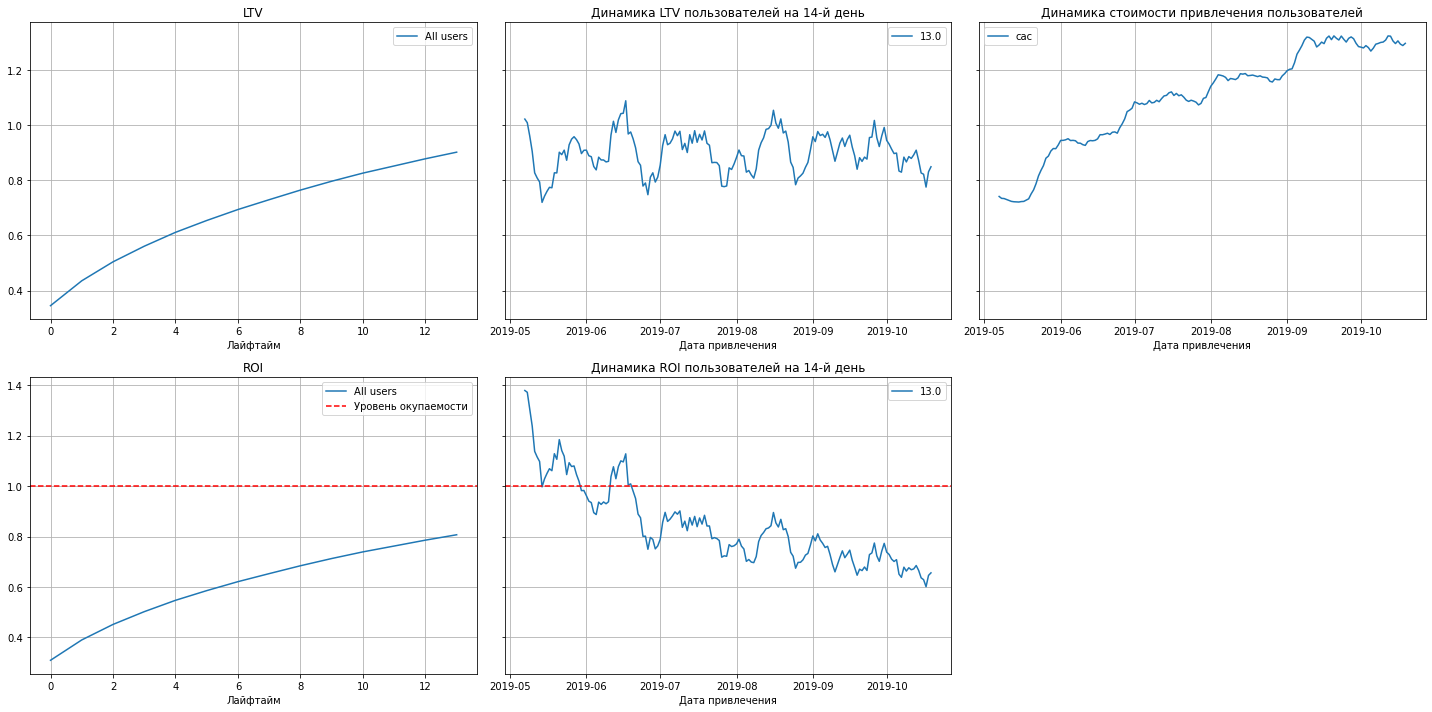

In [55]:
# считаем LTV и ROI
ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days
)

# строим графики
plot_ltv_roi(ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days) 

- график LTV - нормальный;
- LTV к 14 дню порядка 0,9;
- динамика LTV - можно сказать без изменения;
- реклама не окупается;
- САС не стабилен. САС вырос в июне месяце и с тех пор только продолжал рост. Рост САС связан с увеличение бюджета в канале TipTop (временной период - совпадает);
- LTV имеет некую цикличность - снижается к 3ей неделе месяца;
- до июля ROI был в плюсе - кампании окупались;
- негативные события произошли в июне 2019г. В этой точке метрики изменили свой тренд и ситуация ухудшилась. 

#### Конверсия и удержание. Динамика изменения

Проверим конверсию пользователей и динамику её изменения. Тоже самое сделаем с удержанием пользователей. 

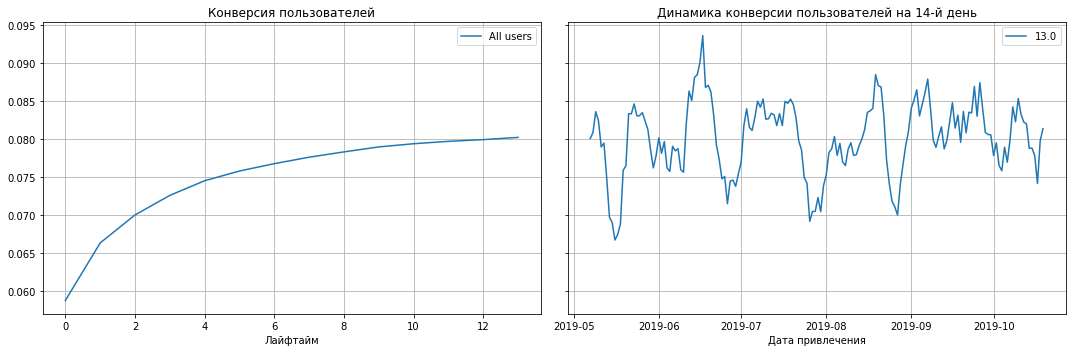

In [56]:
# смотрим конверсию
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days)

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

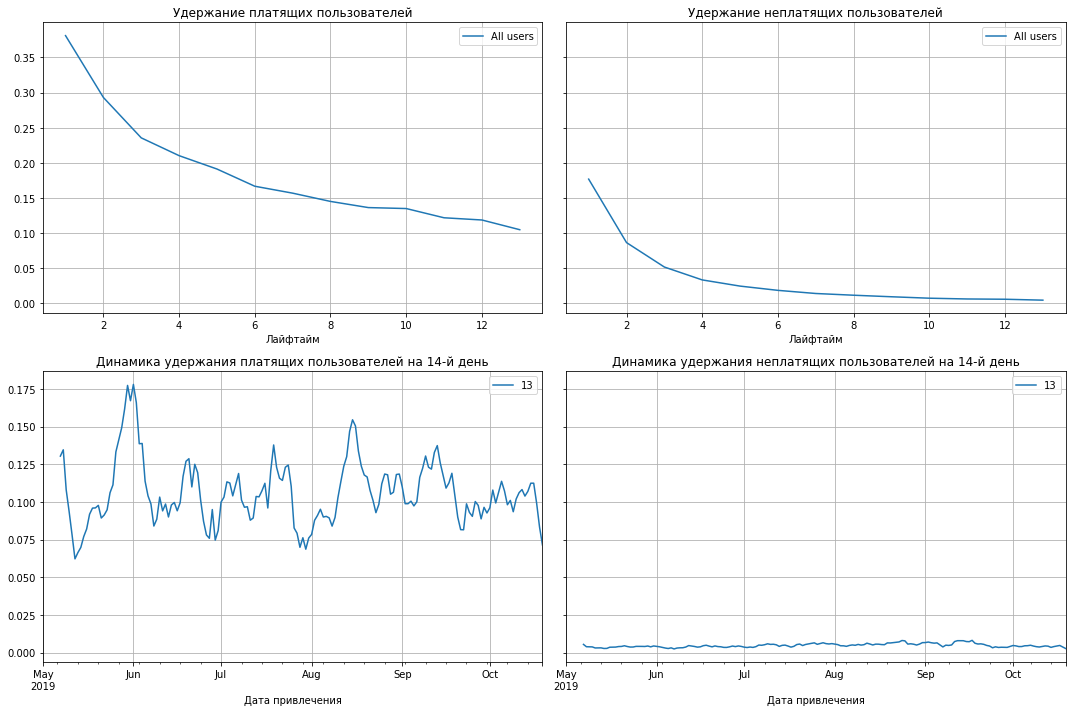

In [57]:
# смотрим удержание

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days)

plot_retention(retention_grouped, retention_history, horizon_days) 

- конверсия существенно растет до 6 дня, далее прирост замедляется. в целом график нормальный;
- динамики удержания платящих и неплатящих - нормальные;
- динамика удержания платящих не стабильна. Лчшие значения этот показатель имел в июне.

#### LTV, CAC, ROI по устройствам

Проанализируем окупаемость рекламы с разбивкой по устройствам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

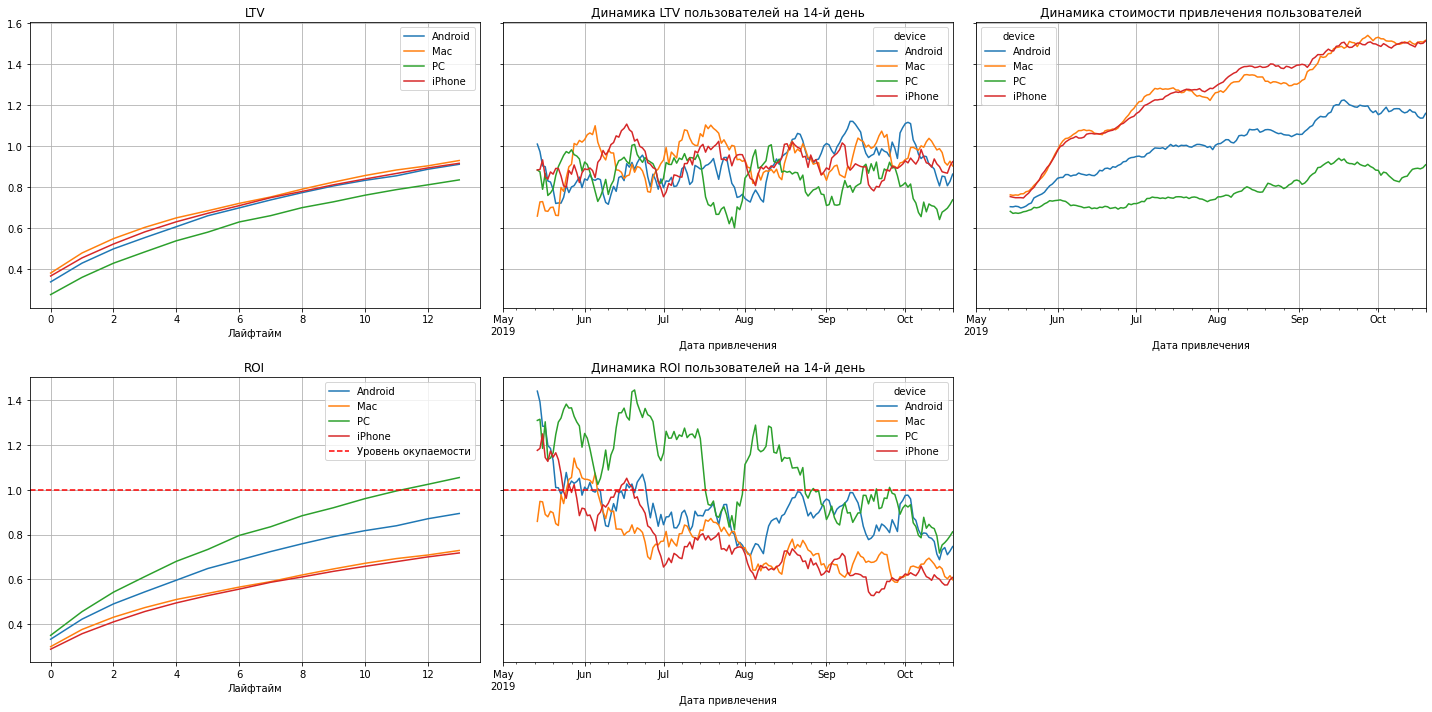

In [58]:
# смотрим окупаемость с разбивкой по устройствам

dimensions = ['device']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- реклама для пользователей с iPhone, Mac, Android не окупается к 14 дню. Окупается только PC;
- у пользователей с Android, PC и iPhone был период в мае когда они окупались. у PC были такие периоды в промежутке май - август;
- в сентябре/октябре реклама не окупается ни на одном из устройств;
- iPhone и Mac показали кратный рост САС (с 0,8 до 1,6). У других устройств динамика роста не такая координальная. 

#### LTV, CAC, ROI по странам

Проанализируем окупаемость рекламы с разбивкой по странам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

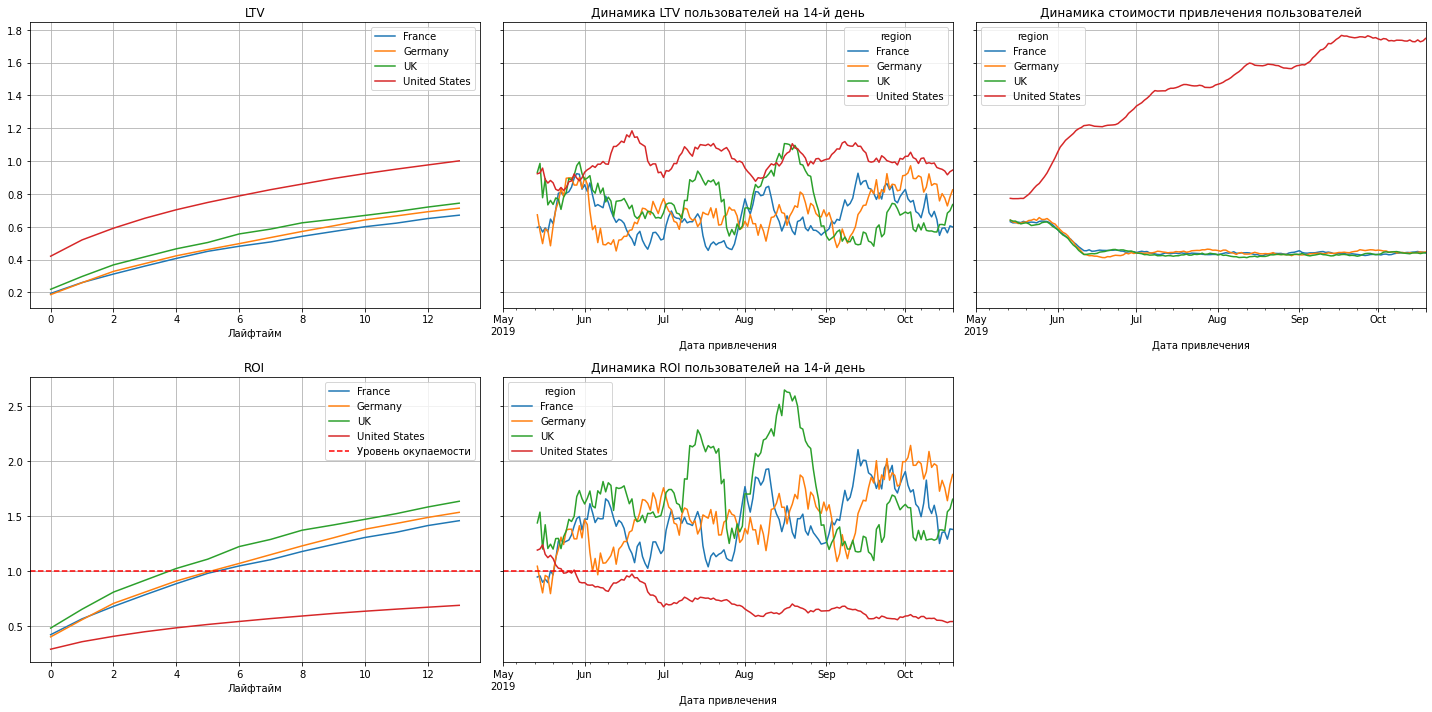

In [59]:
dimensions = ['region']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- CAC в США изначально был выше других стран, его рост кратно увеличился с июня (с 0,8 до 1,8). САС других стран - снизился в июне;
- ROI всех стран кроме США выше 100%. ROI США был выше 100 в мае; 
- все страны выходят на ROI выше 100 с 6 дня пользования приложением. Пользователи из США не достигают этой отметки;
- лучшие показатели по ROI у Великобритании, но они несколько ухудшились в сентябре/октябре.  

#### LTV, CAC, ROI по рекламным каналам

Проанализируем окупаемость рекламы с разбивкой по рекламным каналам. Построим графики LTV и ROI, а также графики динамики LTV, CAC и ROI.

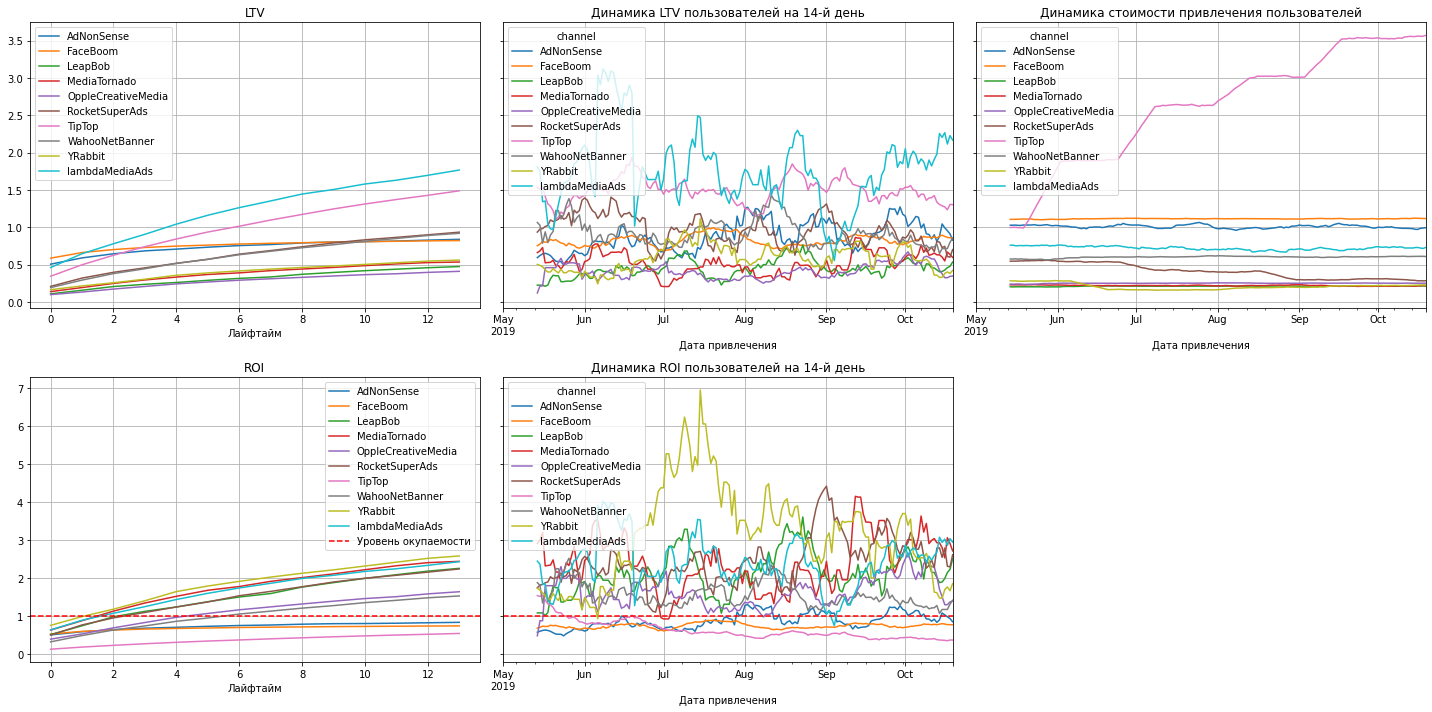

In [60]:
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- стоимость привлечения из TipTop начала расти с июня месяца (график показывает рост на 3/4 неделе каждого месяца, его стабилизацию и дальнейшее увеличение на 3/4 неделе месяца. возможно, каждый месяц в этих числа происходит изменение стратегии/пересмотр актуального СРС);
- не окупаются следующие рекламные каналы: Tiptop, Faceboom, Adnonsense. хорошую окупаемость показывают YRabbit, Media Tomado, lambdaMediaAds и ряд других каналов; 
- Faceboom всегда не окупалался, у TipTom была зона окупаемости в начале периода исследования;
- есть каналы у которых ROI в плюсе на всем периоде надлюдения: YRabbit, Media Tomado, LambdaMediaAds, LeapBob и др. 

#### Конверсия и удержание по странам

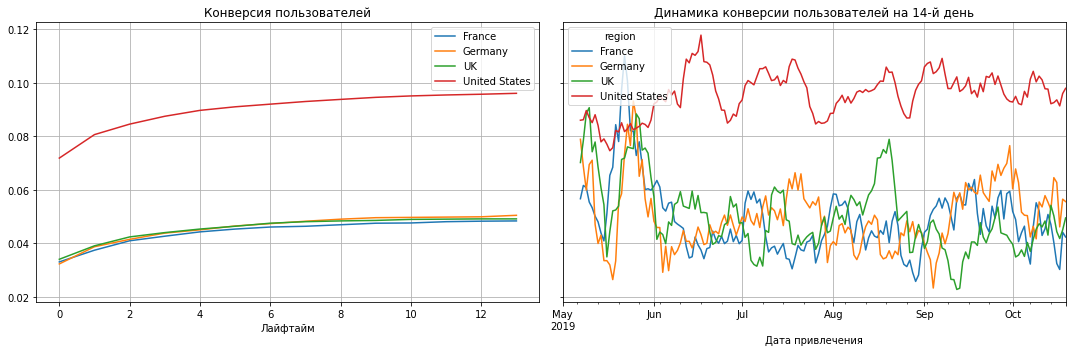

In [61]:
# посмотрим конверсию в разрезе стран
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['region'])

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

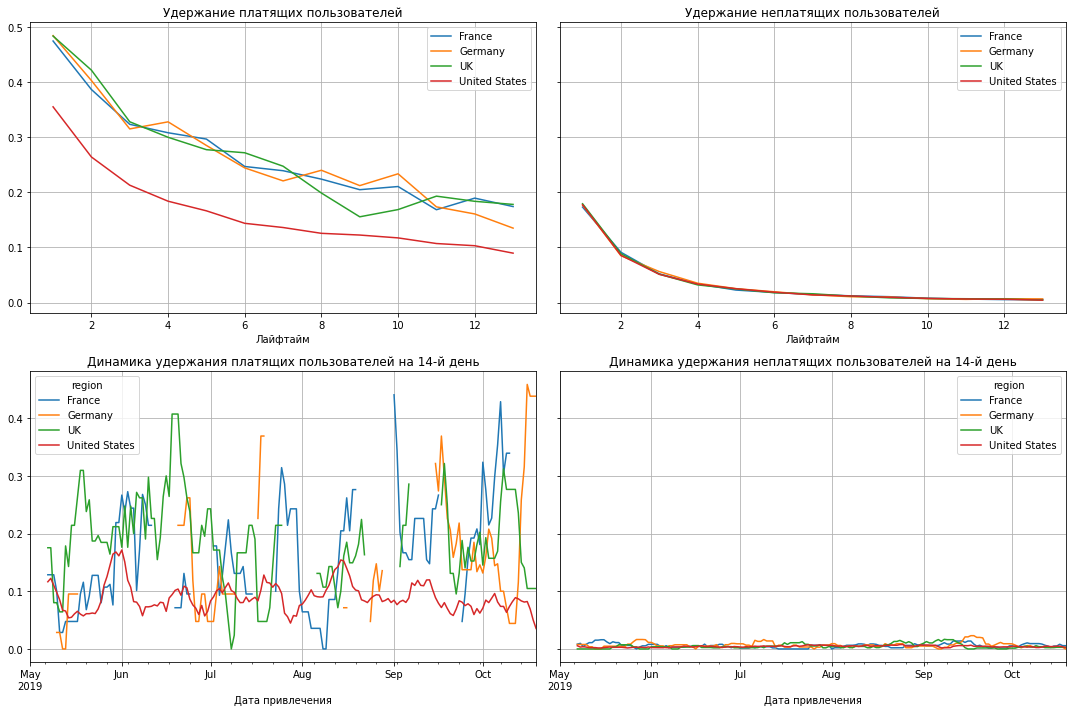

In [62]:
# смотрим удержание по странам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['region'])

plot_retention(retention_grouped, retention_history, horizon_days) 

- конверсия в США в 2 раза выше, чем конверсия других стран;
- с июня месяца (месяца увеличения бюджета РК) конверсия в США только выросла;
- удержание в США ниже, чем удержание других стран (порядка 30%);
- в США был недолгий тренд на увеличение удержания в конце июня.

#### Конверсия и удержание по устройствам

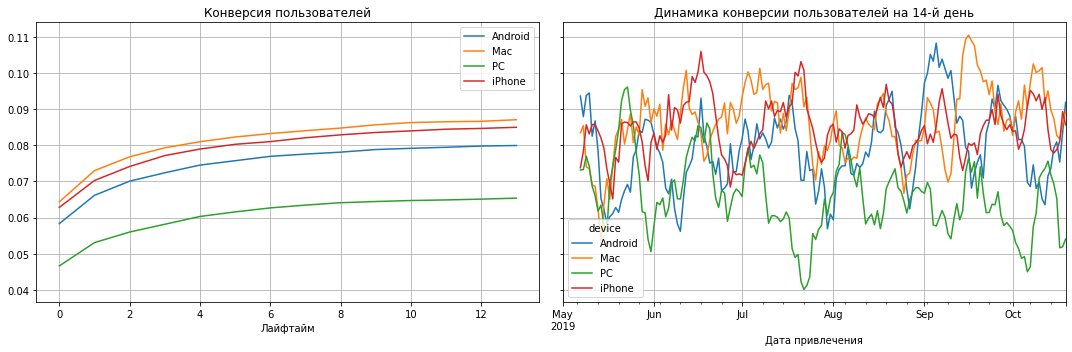

In [63]:
# смотрим конверсию по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['device'])

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

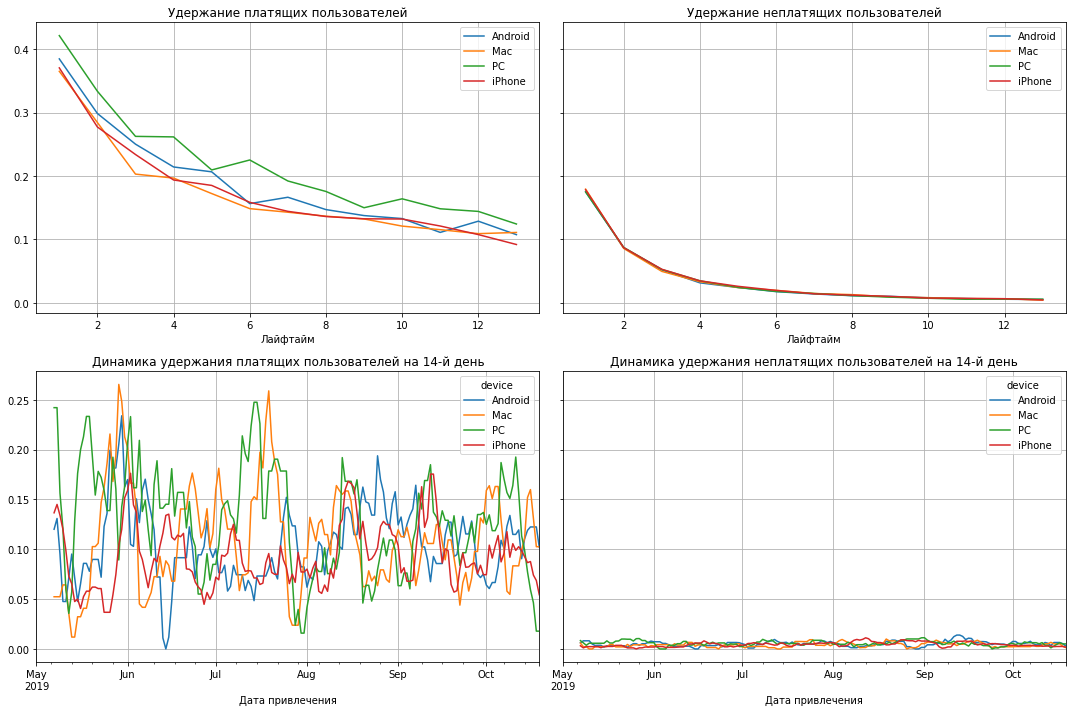

In [64]:
# смотрим удержание по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['device'])

plot_retention(retention_grouped, retention_history, horizon_days) 

- конверсия Mac и iPhone выше, чем других устройств; 
- в удержании нет существенных различий.

#### Конверсия и удержание по каналам

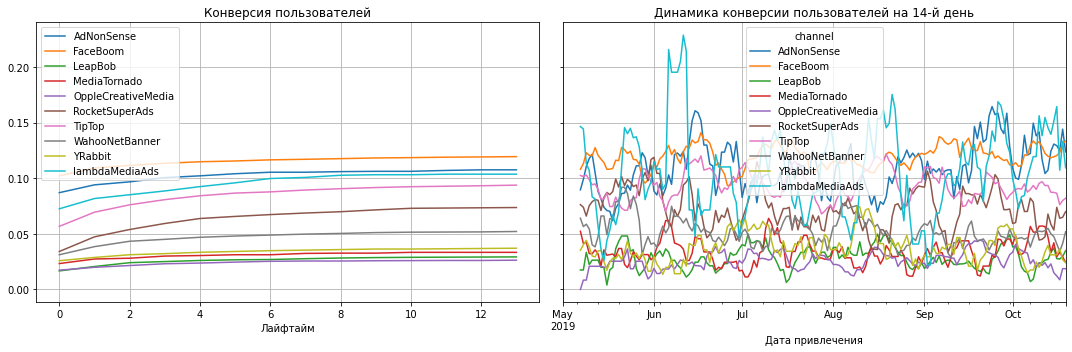

In [65]:
# смотрим конверсию по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['channel'])

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

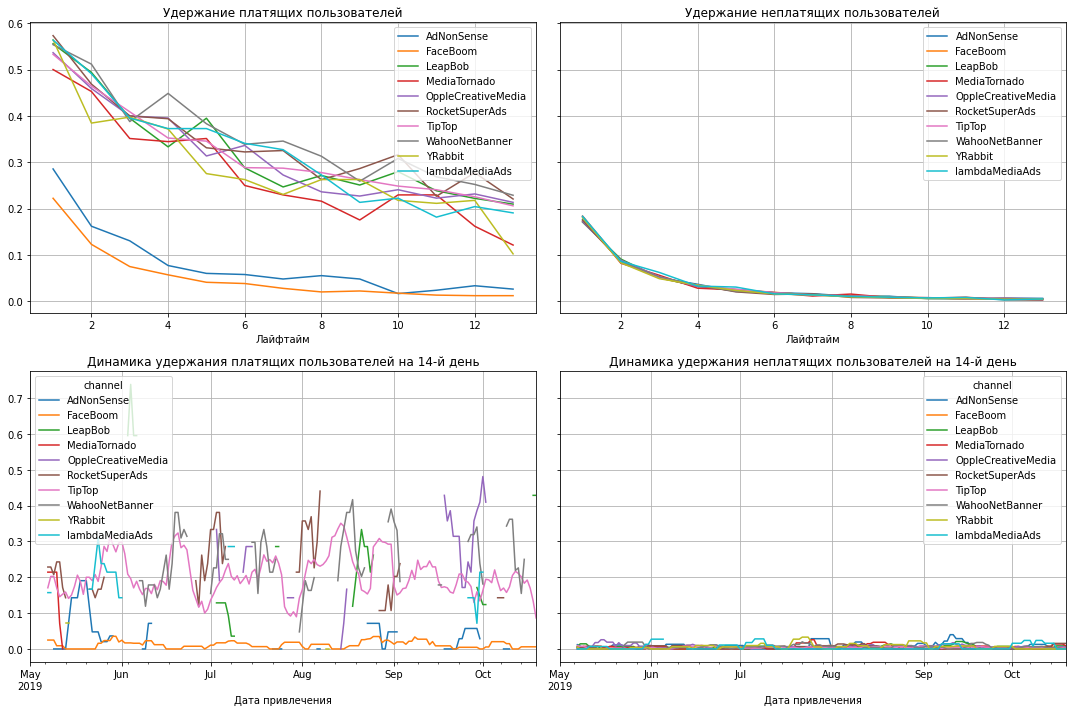

In [66]:
# смотрим удержание по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['channel'])

plot_retention(retention_grouped, retention_history, horizon_days) 

- конверсии Tiptop, Faceboom, Adnonsense одни из наилучших. при этом удержания Faceboom и Adnonsense хуже остальных в 3 раза;
- удержание Faceboom всегда было ниже остальных, запуск кампании никак на это не повлиял. 

#### Конверсия, удержание, каналы рынка США

Рассмотрим детальней ситуацию на рынке США.

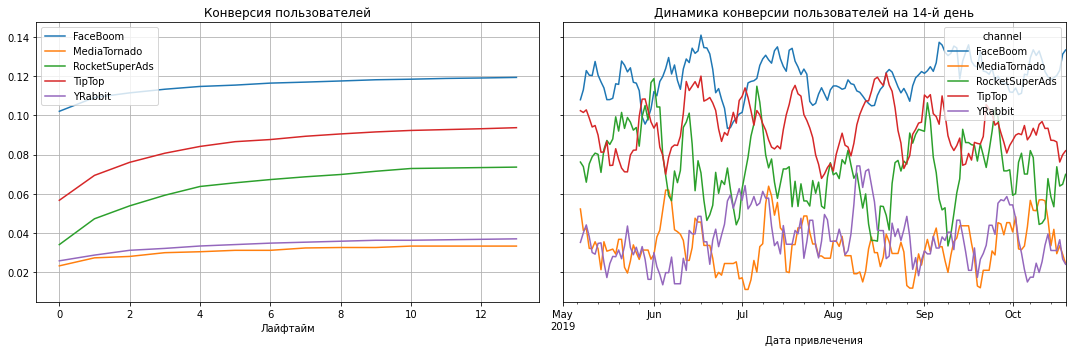

In [67]:
#сделаем срез методом query, посмотрим только рынок США
profiles = profiles.query('region == "United States"')

# смотрим конверсию по устройствам
conversion_raw, conversion_grouped, conversion_history = get_conversion(
    profiles, orders, observation_date, horizon_days, dimensions = ['channel'])

plot_conversion(conversion_grouped, conversion_history, horizon_days) 

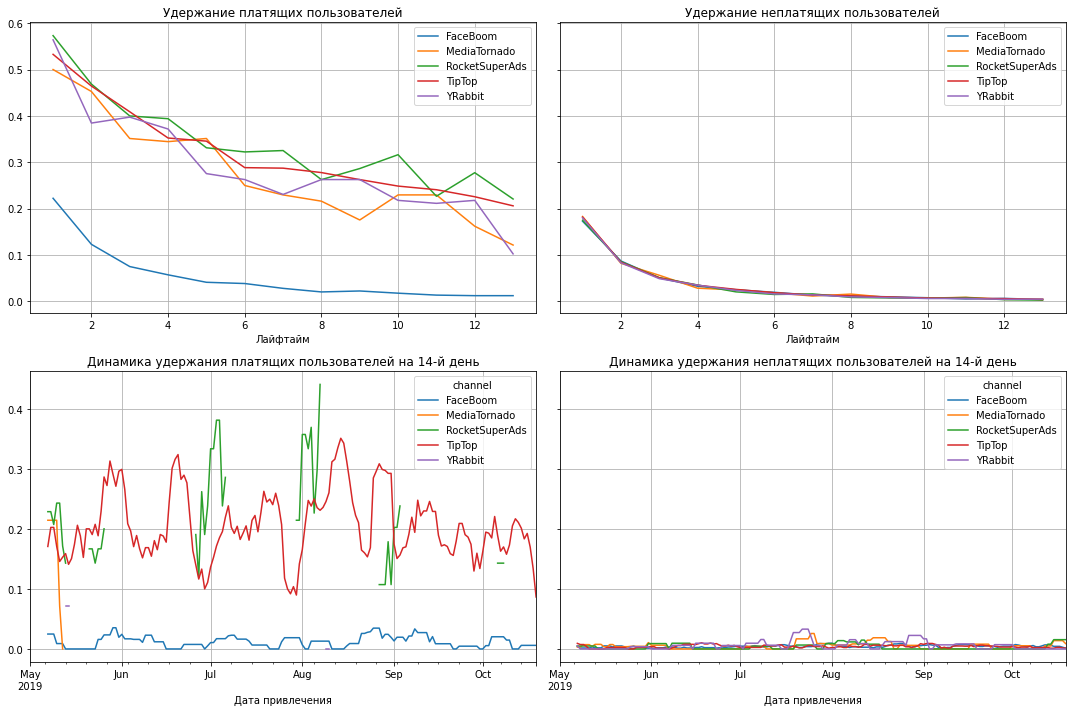

In [68]:
# смотрим удержание по устройствам

retention_raw, retention_grouped, retention_history = get_retention(
    profiles, visits, observation_date, horizon_days, dimensions = ['channel'])

plot_retention(retention_grouped, retention_history, horizon_days) 

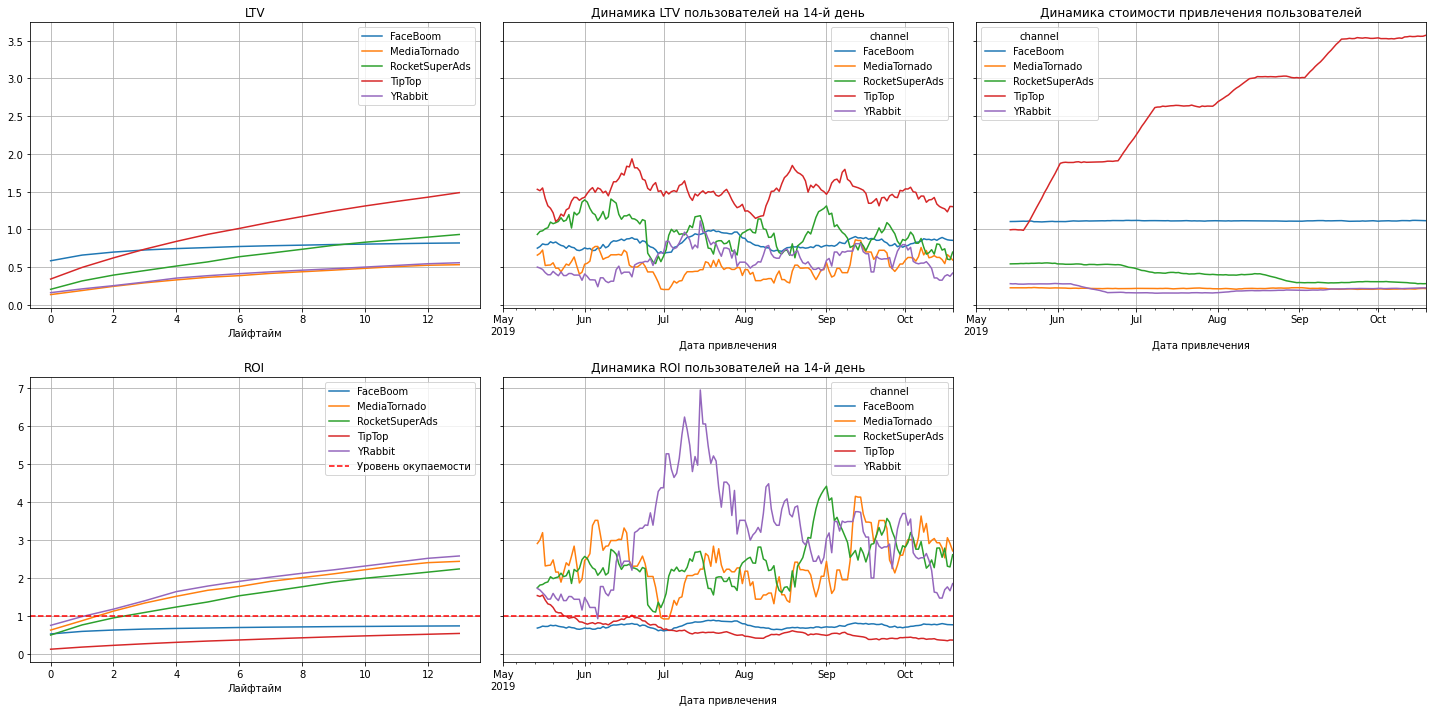

In [69]:
#посмотрим ltv roi cac
dimensions = ['channel']

ltv_raw, ltv_grouped, ltv_history, roi_grouped, roi_history = get_ltv(
    profiles, orders, observation_date, horizon_days, dimensions=dimensions
)

plot_ltv_roi(
    ltv_grouped, ltv_history, roi_grouped, roi_history, horizon_days, window=14
) 

- на данном географическом рынке представлено меньшее количество рекламных каналов. но здесь используются два основных - Faceboom и TipTop;
- заметно меньшая конверсия у FaceBoom и заметно худшее удержание;
- у TipTop - лучший LTV. можно сказать он не менялся по времени;
- у TipTop - худший САС. сильный тренд роста;
- 3 канала в зоне окупаемости ROI.

### Выводы


#### Выводы

Выводы: 
- большая часть аудитории приложения из США, большая часть платящей аудитории приложения также из США;
- боьшая часть аудитории приложения использует устройства apple, большая часть платящей аудитории приложения также использует устройства apple;
- маркетинговый бюджет за май-октябрь составил 105тыс. при этом в мае бюджет был 10тыс, в сентябре и октябре порядка 20тыс;
- в среднем привлечение одного пользователя обходится компании в 1,35. из TipTop - 2,8. из Faceboom - 1,11; 
- LTV пользователей с платных каналов на 14 день = 0,9;
- кампания по привлечению пользователей не эффективна;
- причина неэффективности кампании в неудачном миксе рекламных каналов;
- убытки вызваны тем, что были увеличены бюджеты в рекламных каналах которые не достигали показателя ROI в 100% еще до момента принятия решения об увеличении бюджета. таким образом они стали генерировать еще большие убытки;
- до увеличения рекламного бюджета общий roi был в плюсе за счет organic, т.к. в абсолюте далее он не рос, а росли кампании с низким roi, общий roi стал ниже 100; 
- САС существенно вырос с июня 2019 года (с 0,3 до 0,6 и далее до 0,8) этот рост вызван ростом в канале TipTop;
- вслед за ростом САС выросла и конверсия с июня 2019г (что говорит о том, что привлекаемые пользователи - качественные) при этом рост конверсии сопряжен с периодом увеличения бюджета на Faceboom, дальнейшее увеличение бюджета на TipTop не сопровождалось таким ростом конверсии;
- удержание пользователей имеет небольшой тренд на снижение;
- не окупаются пользователи, приходящие с MAC и iPhone, из США, с рекламных каналов Tiptop и Faceboom. у графиков одинаковые тренды - это одни и те же пользователи. при этом эти же пользователи лучше конвертятся и являютс основной аудиторией приложения (из платных источников);
- кампании в целом  перестали окупаться с июня 2019 года, в этом же периоде был существенно увеличен бюджет в канале Tiptop;
- TipTop забирает 52% бюджета продвижения, FaceBoom 31%. при этом FaceBoom приводит 40% от всех платящих, TipTop 21%. TipTop генерит больший убыток. при этом оба канала убыточны;
- пользователи из США имеют конверсию в платящих в 2 раза выше, чем пользователи остальных стран. при этом удержание на 30% ниже, чем пользователи остальных стран;
- изменения кампаний в периоде начала июня были удачны: конверсия выросла, удержание выросло;
- конверсии Tiptop, Faceboom, Adnonsense одни из наилучших. при этом удержания Faceboom и Adnonsense хуже остальных в 3 раза;
- в целом можно говорить о том что Faceboom масштабируемый канал для компании, пользователи проявляют интерес к рекламе, хорошо конвертятся, но плохо удерживаются, за счет этого кампания не окупается;
- для рынка США: FaceBoom не окупался никогда. TipTop имел зону окупаемости в начале. у TipTop хорошее LTV, но самый высокий CAC. при этом нет связи роста САС и его влияния на LTV (зависимости нет). ряд каналов: YRabbit, Tomado, Rocket - всегда были в зоне окупаемости с хорошим ROI. 

#### Рекомендации

1. Провести аудит кампаний в Tiptop, Faceboom, Adnonsense:
- проверить какие были настройки в кампаниях в мае 2019г; 
- понять, меняли ли сами кампании, либо был просто увеличен бюджет (по мере увеличения САС росла и конверсия, привлекаемая аудитория становилась качественней);
- если были изменены сами кампании - вернуться к предыдущим настройкам, оптимизировать их, снизить бюджет до уровня мая и постепенно его увеличивать следя за основными метриками эффективности рекламных кампаний;
- если был увеличен бюджет в кампаниях мая - нужно пробовать другие настройки кампаний на меньших бюджетах, постепенно увеличивать бюджет следя за основными метриками эффективности рекламных кампаний;
- на рынке США Tiptop имеет высокий LTV. на LTV никак не повлиял рост САС. нужно вернуться к настройкам мая;
- обратить внимание на низкую удерживаемость с канала Faceboom. возможно, рекламное предложение не соответствует действительности. 
2. Проработать другие рекламные каналы: 
- оценить, возможно ли увеличение бюджета и привлечение большего количества пользователей из таких каналов как YRabbit, Media Tomado, LambdaMediaAds, LeapBob, Rocket. эти каналы имеют положительный ROI; 
- повторно оценить рынок, подключить ранее не используемые каналы. 
3. Провести пользовательские тесты для Mac/iPhone: 
- исключить возможность технических ошибок для устройств apple. возможно, они влияют на низкую удерживаемость. возможно, для устройств apple не очевидные настройки и механики по повторным оплатам.
4. Провести пользовательские тесты для региона США:
- исключить возможность технических ошибок для данного региона. 
5. Проверить верность учета рекламного канала: 
- проверить настройки трекинговых систем. 
6. Пересмотреть бизнес-модель:
- кампании в Tiptop и Faceboom приносят 83% всех платящих пользователей. они - основной канал привлечения платящей аудитории. возможно, что в процессе аудита выяснится, что они могут приносить такой объем пользователей только на больших СРС. и тогда сокращение бюджета в этих каналах приведет к значительному снижению платящей аудитории. в таком случае бизнес-модель будет нуждаться в пересмотре. возможно, для окупаемости нужно больше дней и тогда нужны новые стратегии по удержанию пользователей и по увеличению конверсии из не платящих в платящих. 
7. Рассмотреть другие географические рынки:
- рынок Великобритании схож с рынком США и показывает положительную динамику, возможно, там стоит усилиться. А также рассмотреть другие англоязычные страны для продвижения приложения. 